<a href="https://colab.research.google.com/github/Ashutosh-Singh-Thakur/OIBSIB/blob/main/TASK-2/Unemployment-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uneployment Analysis with Python

## Table of Contents

1. [Data Loading and Cleaning](#data-loading-and-cleaning)
2. [Top States with Highest Unemployment](#top-states-with-highest-unemployment)
3. [Top Months with Highest Unemployment](#top-months-with-highest-unemployment)
4. [State-wise Unemployment Analysis](#state-wise-unemployment-analysis)
5. [Unemployment and Labour Participation Rates](#unemployment-and-labour-participation-rates)
6. [Month-wise Unemployment Analysis](#month-wise-unemployment-analysis)
7. [Bar Plot of Unemployment Rate (Monthly)](#bar-plot-of-unemployment-rate-monthly)
8. [Conclusion](#conclusion)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

## Data Loading and Cleaning

In [2]:
# Load the dataset
file_url = 'https://raw.githubusercontent.com/Ashutosh-Singh-Thakur/OIBSIP/main/TASK-2/Unemployment%20in%20India.csv'
df = pd.read_csv(file_url)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
# Check dataset information and handle missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
# Drop rows with missing values
df.dropna(inplace = True)

In [6]:
# Check for duplicated rows
df.duplicated().sum()

0

In [7]:
# Display descriptive statistics
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


## Top States with Highest Unemployment

In [8]:
#to print the columns
df.columns=['State','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate', 'Area']

# Print the state with the highest unemployment
print("State with highest Unemployment:-", df['State'].value_counts().idxmax())

# Print the state with the lowest unemployment
print("State with Lowest Unemployment:-", df['State'].value_counts().idxmin())

State with highest Unemployment:- Andhra Pradesh
State with Lowest Unemployment:- Chandigarh


## Top Months with Highest Unemployment

In [9]:
import datetime as dt
import calendar

In [10]:
# Extract month information
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['month_int'] =  df['Date'].dt.month
df['month'] =  df['month_int'].apply(lambda x: calendar.month_abbr[x])

# Print the month with the highest unemployment
print("Month with highest Unemployment:-", df['month'].value_counts().idxmax())

# Print the month with the lowest unemployment
print("Month with lowest Unemployment:-", df['month'].value_counts().idxmin())

Month with highest Unemployment:- May
Month with lowest Unemployment:- Apr


## State-wise Unemployment Analysis

In [11]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [12]:
# Drop unwanted columns
df = df.drop(columns=['Frequency', 'month_int'])

# Top 10 states with highest unemployment
df1 = df[['State', 'Estimated Unemployment Rate']].groupby('State').sum().sort_values(by='Estimated Unemployment Rate', ascending=False)
df1.head(10)

,Estimated Unemployment Rate
State,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


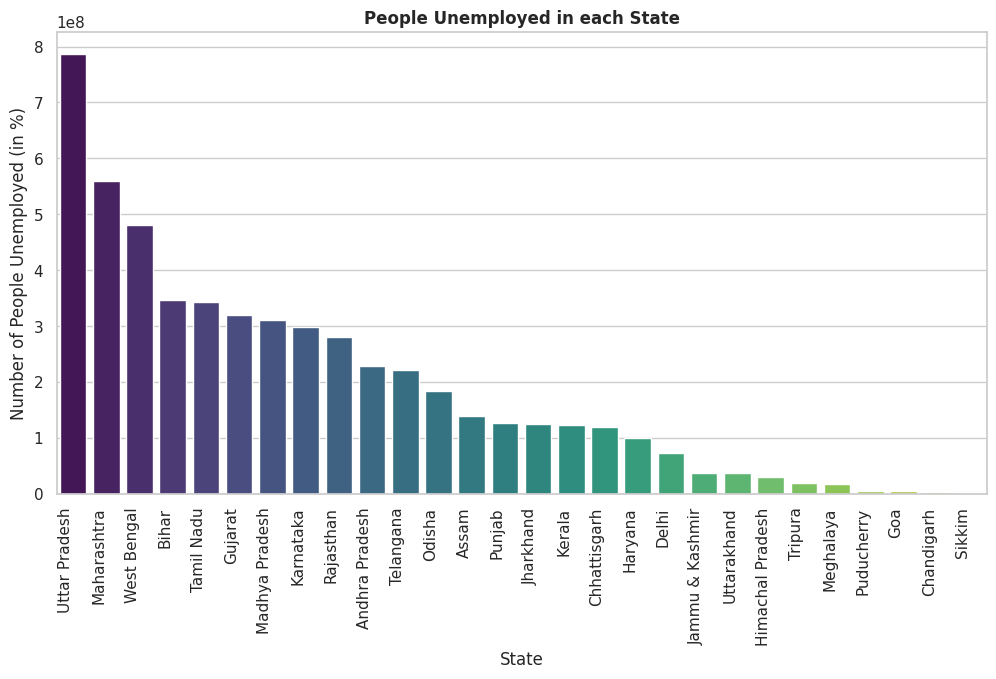

In [13]:
# State-wise rate of unemployment
df3 = df[["State", "Estimated Employed"]].groupby("State").sum().sort_values(by="Estimated Employed", ascending=False)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot with Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df3.index, y="Estimated Employed", data=df3, palette="viridis")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_title("People Unemployed in each State", fontweight = 'bold')
ax.set_xlabel("State")
ax.set_ylabel("Number of People Unemployed (in %)")

# Show the plot
plt.show()

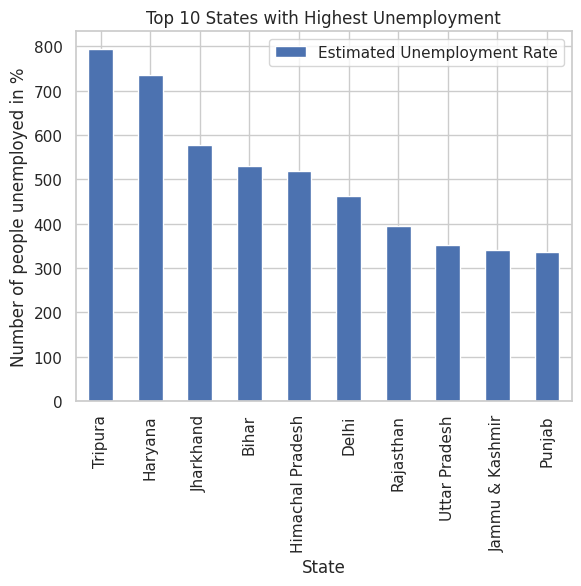

In [14]:
# Visualization of top 10 states with highest unemployment
df1[:10].plot(kind = "bar",
              title = "Top 10 States with Highest Unemployment",
              xlabel = "State",
              ylabel = "Number of people unemployed in %")
plt.show()

## Unemployment and Labour Participation Rates

In [15]:
# Visualization of Unemployment Rate and Labour Participation Rate in each month
IND = df.groupby(["month"])[['Estimated Unemployment Rate', "Estimated Employed", "Estimated Labour Participation Rate"]].mean()
IND = pd.DataFrame(IND).reset_index()
month = IND.month
unemployment_rate = IND["Estimated Unemployment Rate"]
labour_participation_rate = IND["Estimated Labour Participation Rate"]

fig = go.Figure()
fig.add_trace(go.Bar(x=month, y=unemployment_rate, name="Unemployment Rate"))
fig.add_trace(go.Bar(x=month, y=labour_participation_rate, name="Labour Participation Rate"))
fig.update_layout(title="Unemployment Rate and Labour Participation Rate",
                  xaxis={"categoryorder": "array", "categoryarray": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]})
fig.show()

## Month-wise Unemployment Analysis

In [16]:
# Top 10 months with highest unemployment
df2 = df[["month", "Estimated Unemployment Rate"]].groupby("month").sum().sort_values(by="Estimated Unemployment Rate", ascending=False)
df2.head(10)

,Estimated Unemployment Rate
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


## Bar Plot of Unemployment Rate (Monthly)

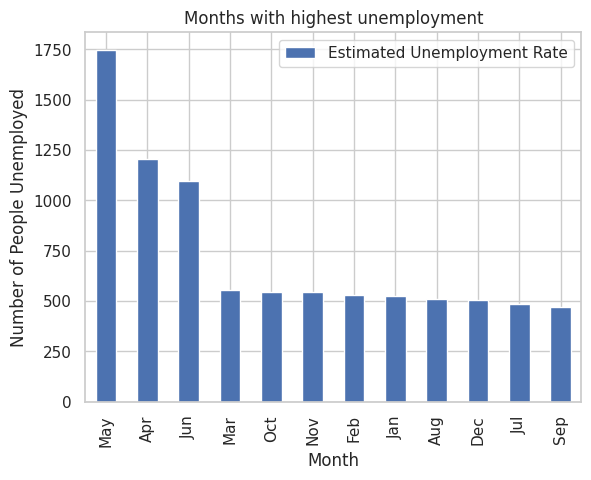

In [17]:
# Visualization of top 10 months with highest unemployment
df2.plot(kind = "bar",
         title = "Months with highest unemployment",
         xlabel = "Month",
         ylabel = "Number of People Unemployed")
plt.show()

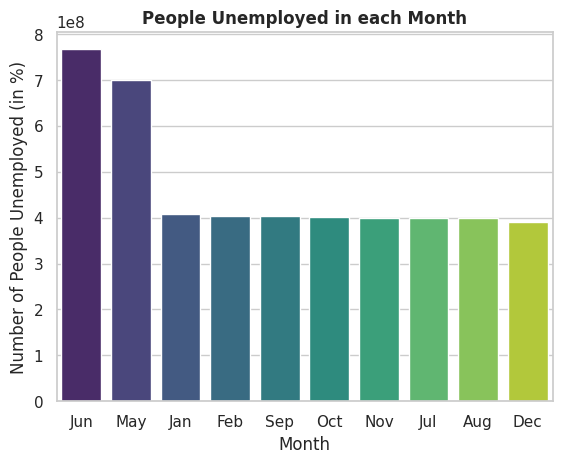

In [18]:
# Grouping and sorting the data
df4 = df[["month", "Estimated Employed"]].groupby("month").sum().sort_values(by="Estimated Employed", ascending=False)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot with Seaborn
sns.barplot(x=df4.index[:10], y="Estimated Employed", data=df4[:10], palette="viridis")

# Adding titles and labels
plt.title("People Unemployed in each Month", fontweight = 'bold')
plt.xlabel("Month",)
plt.ylabel("Number of People Unemployed (in %)")

# Show the plot
plt.show()

## Conclusion

1. State with highest Unemployment: Andhra Pradesh
2. State with Lowest Unemployment: Chandigarh
3. Month with highest Unemployment: May
4. Month with lowest Unemployment: April
5. Graph Progress: Higher The labour participation Lower the unemployment rate

# Author
Ashutosh Singh Thakur